## USGS RECTANGULAR DATA Latitude: [-57.136, 61.939] , Longitude: [-257.695, -65]  between 1993 - Now


In [2]:
import numpy as np
import pandas as pd

# List to store dataframes
dfs = []

# Loop over the years from 1993 to 2024 and construct file paths dynamically
for year in range(1993, 2025):
    # Handle the special case of 2024 where data ends at 2024-09-09
    if year == 2024:
        file_path = f"../../data/raw/usgs-data/circum-pacific-seismic-belt/{year}-01-01_2024-09-09.csv"
    else:
        file_path = f"../../data/raw/usgs-data/circum-pacific-seismic-belt/{year}-01-01_{year}-12-31.csv"
    
    # Read each year's CSV and append it to the list
    try:
        df = pd.read_csv(file_path)
        dfs.append(df)
        print(f"Loaded: {file_path}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        continue

# Concatenate all DataFrames into one
full_earthquake_data = pd.concat(dfs, ignore_index=True)

unique_earthquake_data = full_earthquake_data.drop_duplicates(subset='id')
unique_earthquake_data.rename(columns={
    'id': 'Event ID',
    'time': 'Datetime',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'depth': 'Depth(km)',
    'mag': 'xM'
}, inplace=True)

unique_earthquake_data['Datetime'] = pd.to_datetime(unique_earthquake_data['Datetime']).dt.strftime('%d/%m/%Y %H:%M:%S')
df_converted =  unique_earthquake_data[['Event ID', 'Datetime', 'Latitude', 'Longitude', 'Depth(km)', 'xM']]
df_converted

Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/1993-01-01_1993-12-31.csv
File not found: ../../data/raw/usgs-data/circum-pacific-seismic-belt/1994-01-01_1994-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/1995-01-01_1995-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/1996-01-01_1996-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/1997-01-01_1997-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/1998-01-01_1998-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/1999-01-01_1999-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/2000-01-01_2000-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/2001-01-01_2001-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/2002-01-01_2002-12-31.csv
Loaded: ../../data/raw/usgs-data/circum-pacific-seismic-belt/2003-01-01_2003-12-31.csv
Loaded: ../../data/raw/usgs-data/ci

,Event ID,Datetime,Latitude,Longitude,Depth(km),xM
0,usp0005k5r,01/01/1993 02:33:07,3.8340,126.4750,86.100,4.4
1,usp0005k5s,01/01/1993 02:54:42,35.1960,111.0310,10.000,3.9
2,usp0005k5u,01/01/1993 03:46:33,-31.9260,-178.0700,33.000,5.1
3,ak9931pzpqo,01/01/1993 04:12:28,60.2248,-152.7263,10.200,3.1
4,usp0005k5y,01/01/1993 04:30:08,53.2260,157.6020,169.700,4.2
...,...,...,...,...,...,...
416413,ak024bmotrix,09/09/2024 16:55:41,60.0269,-146.2638,7.800,3.3
416414,us6000nqqj,09/09/2024 17:24:09,-31.7067,-72.2578,10.000,4.4
416415,us6000nqqz,09/09/2024 17:37:09,-6.2723,-107.1024,10.000,5.5
416416,us6000nqre,09/09/2024 19:31:28,17.8394,119.8370,10.000,4.5


In [8]:
df_converted.to_csv("../../data/cleaned/usgs_pacific_belt_93_now_rectangular_region.csv")

In [3]:
from src.util import earthquake_filter_utils
df_large = earthquake_filter_utils.magnitude_filter(df_converted, 5.5)
df_large

,Event ID,Datetime,Latitude,Longitude,Depth(km),xM
41,usp0005k8d,03/01/1993 04:23:34,-1.5130,119.6790,37.200,5.7
50,usp0005k8x,03/01/1993 17:08:13,-4.0640,129.5120,53.700,5.8
58,usp0005k97,04/01/1993 01:26:17,3.2660,128.0940,72.300,5.9
76,usp0005ka8,04/01/1993 20:41:11,-22.0550,-174.8660,33.000,6.0
112,usp0005kdw,07/01/1993 12:02:10,-32.0310,-178.0730,10.000,5.6
...,...,...,...,...,...,...
416319,us6000npu5,05/09/2024 10:38:26,-19.1251,-67.3038,222.966,5.7
416334,us6000nq0y,06/09/2024 10:12:58,-28.6861,-69.5171,123.000,5.7
416367,us6000nqd8,07/09/2024 22:39:07,-21.2926,-173.7204,10.000,6.0
416377,us6000nqf4,08/09/2024 05:01:41,-7.4177,156.1219,42.328,5.5


In [4]:
df_converted['Datetime'] = pd.to_datetime(df_converted['Datetime'], format="%d/%m/%Y %H:%M:%S")

df_converted =  (df_converted[df_converted['Datetime'] >= pd.Timestamp('1993-01-01')]).sort_values('Datetime', ascending=True)
df_converted

C:\Users\M13\AppData\Local\Temp\ipykernel_17708\2277187866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_converted['Datetime'] = pd.to_datetime(df_converted['Datetime'], format="%d/%m/%Y %H:%M:%S")


,Event ID,Datetime,Latitude,Longitude,Depth(km),xM
0,usp0005k5r,1993-01-01 02:33:07,3.8340,126.4750,86.100,4.4
1,usp0005k5s,1993-01-01 02:54:42,35.1960,111.0310,10.000,3.9
2,usp0005k5u,1993-01-01 03:46:33,-31.9260,-178.0700,33.000,5.1
3,ak9931pzpqo,1993-01-01 04:12:28,60.2248,-152.7263,10.200,3.1
4,usp0005k5y,1993-01-01 04:30:08,53.2260,157.6020,169.700,4.2
...,...,...,...,...,...,...
416413,ak024bmotrix,2024-09-09 16:55:41,60.0269,-146.2638,7.800,3.3
416414,us6000nqqj,2024-09-09 17:24:09,-31.7067,-72.2578,10.000,4.4
416415,us6000nqqz,2024-09-09 17:37:09,-6.2723,-107.1024,10.000,5.5
416416,us6000nqre,2024-09-09 19:31:28,17.8394,119.8370,10.000,4.5


### Adding X, Y, Z Cartesian coordinates to df.

In [5]:
from src.util.earthquake_efficient_filter_utils import lat_lon_to_cartesian_vectorized

df_converted = lat_lon_to_cartesian_vectorized(df_converted)
df_converted

,Event ID,Datetime,Latitude,Longitude,Depth(km),xM,X,Y,Z
0,usp0005k5r,1993-01-01 02:33:07,3.8340,126.4750,86.100,4.4,-3778.904702,5111.559593,426.003261
1,usp0005k5s,1993-01-01 02:54:42,35.1960,111.0310,10.000,3.9,-1868.395728,4859.477002,3672.086828
2,usp0005k5u,1993-01-01 03:46:33,-31.9260,-178.0700,33.000,5.1,-5404.202872,-182.108671,-3369.134719
3,ak9931pzpqo,1993-01-01 04:12:28,60.2248,-152.7263,10.200,3.1,-2812.097715,-1449.797564,5529.903658
4,usp0005k5y,1993-01-01 04:30:08,53.2260,157.6020,169.700,4.2,-3526.328461,1453.303707,5103.190857
...,...,...,...,...,...,...,...,...,...
416413,ak024bmotrix,2024-09-09 16:55:41,60.0269,-146.2638,7.800,3.3,-2646.918149,-1767.692156,5518.942811
416414,us6000nqqj,2024-09-09 17:24:09,-31.7067,-72.2578,10.000,4.4,1651.700170,-5162.330198,-3348.413725
416415,us6000nqqz,2024-09-09 17:37:09,-6.2723,-107.1024,10.000,5.5,-1862.370491,-6052.827735,-696.055716
416416,us6000nqre,2024-09-09 19:31:28,17.8394,119.8370,10.000,4.5,-3017.383766,5260.768572,1951.755682


In [5]:
from src.data import preprocess
import torch

X_test, y_test, time_differences, label1_event_ids = preprocess.create_classification_data(df_converted, df_large)
print(torch.sum(y_test == 1).item()) # Shows total number of earthquake samples with label 1.
label1_event_ids

Error processing event ID usp0005k8d: PAST EARTHQUAKE ERROR: usp0005k8d with only 0 past earthquakes available.
Error processing event ID usp0005k8x: PAST EARTHQUAKE ERROR: usp0005k8x with only 0 past earthquakes available.
Error processing event ID usp0005k97: PAST EARTHQUAKE ERROR: usp0005k97 with only 0 past earthquakes available.
Error processing event ID usp0005ka8: PAST EARTHQUAKE ERROR: usp0005ka8 with only 0 past earthquakes available.
Error processing event ID usp0005kdw: PAST EARTHQUAKE ERROR: usp0005kdw with only 0 past earthquakes available.
Error processing event ID usp0005kdx: PAST EARTHQUAKE ERROR: usp0005kdx with only 1 past earthquakes available.
Error processing event ID usp0005ke8: PAST EARTHQUAKE ERROR: usp0005ke8 with only 0 past earthquakes available.
Error processing event ID usp0005kh7: PAST EARTHQUAKE ERROR: usp0005kh7 with only 0 past earthquakes available.
Error processing event ID usp0005kk2: PAST EARTHQUAKE ERROR: usp0005kk2 with only 0 past earthquakes ava

['usp0007c29',
 'usp0007fhn',
 'usp0007sbt',
 'usp0007sdu',
 'usp0007sdx',
 'usp0007sfq',
 'usp0007sk7',
 'usp0007ste',
 'usp00080vf',
 'usp00092q2',
 'nc21014765',
 'usp0009cfy',
 'usp0009jr5',
 'usp0009knd',
 'usp0009m3d',
 'usp0009qmh',
 'usp0009qmk',
 'usp0009sd5',
 'usp0009uj1',
 'usp0009vcx',
 'usp0009vmj',
 'usp0009w27',
 'usp0009x1y',
 'usp0009x8d',
 'usp0009x8e',
 'usp0009xe8',
 'usp0009xf4',
 'usp0009xf5',
 'usp0009ypm',
 'usp000a78u',
 'usp000abf1',
 'usp000afda',
 'usp000aj2g',
 'usp000akkb',
 'usp000avfc',
 'ci12456384',
 'usp000b3pq',
 'usp000b68u',
 'usp000bhp1',
 'usp000bk1u',
 'usp000bmct',
 'usp000bsdf',
 'usp000bvs1',
 'usp000bw88',
 'usp000bwgd',
 'usp000c097',
 'usp000ca5w',
 'usp000cadd',
 'usp000cdts',
 'usp000cg3h',
 'usp000chjs',
 'usp000cv6g',
 'usp000cxvg',
 'usp000d06r',
 'usp000d06s',
 'usp000d3fm',
 'usp000d3uu',
 'usp000d3wt',
 'usp000d565',
 'usp000d6b7',
 'usp000d9d4',
 'usp000d9fy',
 'usp000daa4',
 'usp000ddaa',
 'usp000dfuh',
 'usp000dgk6',
 'usp000dh

### We have 1043 samples of 1s with aftershocks included for default number_of_earthquakes=30

In [ ]:
torch.save(X_test, "../../data/raw/X_tensor_pacific_belt.pt")
torch.save(y_test, "../../data/raw/y_tensor_pacific_belt.pt")
torch.save(time_differences, "../../data/raw/time_difference_tensor_pacific_belt.pt")

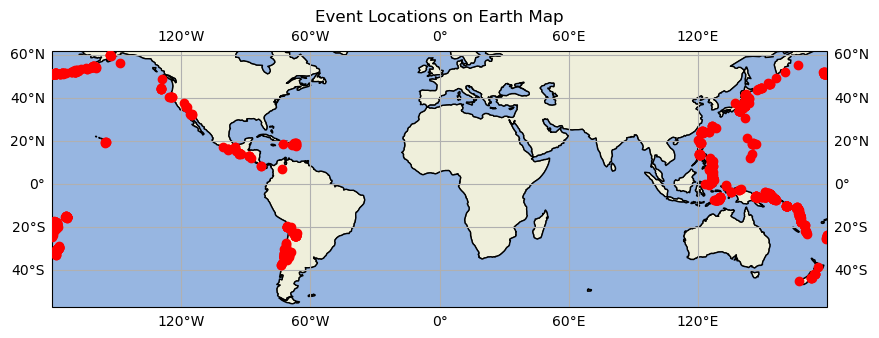

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

filtered_df = df_converted.copy()
filtered_df = filtered_df[filtered_df['Event ID'].isin(label1_event_ids)]

event_latitudes = filtered_df['Latitude'].tolist()
event_longitudes = filtered_df['Longitude'].tolist()

# Create a figure and axis with the Mercator projection
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the region you want to display (rectangular area)
ax.set_extent([-257.695, -65, -57.136, 61.939], crs=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add natural features like land and oceans
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Plot the points on the map
ax.scatter(event_longitudes, event_latitudes, color='red', marker='o', transform=ccrs.PlateCarree(), zorder=5)

# Title and show
plt.title("Event Locations on Earth Map")
plt.show()


In [6]:
df_new = df_converted.copy()
df_new = df_new[
    ((-60 <= df_new['Latitude']) & (df_new['Latitude'] <= 60) & (-130 <= df_new['Longitude']) & (df_new['Longitude'] <= -70)) |
    ((-60 <= df_new['Latitude']) & (df_new['Latitude'] <= 60) & (120 <= df_new['Longitude']) & (df_new['Longitude'] <= 180))]
df_new

,Event ID,Datetime,Latitude,Longitude,Depth(km),xM,X,Y,Z
0,usp0005k5r,1993-01-01 02:33:07,3.8340,126.4750,86.100,4.4,-3778.904702,5111.559593,426.003261
4,usp0005k5y,1993-01-01 04:30:08,53.2260,157.6020,169.700,4.2,-3526.328461,1453.303707,5103.190857
6,se61290,1993-01-01 05:08:05,35.8780,-82.0860,2.300,3.0,710.766894,-5113.043689,3733.796414
7,usp0005k62,1993-01-01 05:19:07,-6.5180,130.5200,68.200,4.6,-4112.568742,4811.797171,-723.206282
8,usp0005k64,1993-01-01 05:36:55,30.5650,-113.9890,10.000,3.6,-2230.300490,-5011.926288,3239.752400
...,...,...,...,...,...,...,...,...,...
416410,us6000nqp5,2024-09-09 16:25:17,51.5773,177.8293,60.660,3.8,-3956.469202,149.966004,4991.342770
416411,us6000nqp4,2024-09-09 16:28:19,-6.2784,151.9632,43.505,4.8,-5589.609541,2976.654762,-696.729941
416414,us6000nqqj,2024-09-09 17:24:09,-31.7067,-72.2578,10.000,4.4,1651.700170,-5162.330198,-3348.413725
416415,us6000nqqz,2024-09-09 17:37:09,-6.2723,-107.1024,10.000,5.5,-1862.370491,-6052.827735,-696.055716


In [11]:
from src.data import preprocess
import torch
df_new2 = df_new.copy()
df_new2 = df_new2[df_new2['Datetime'] > '2000-01-01']
X_test_label0, y_test_label0, _ = preprocess.create_classification_data(df_converted, df_new2)
y_test_label0.size()

Error processing event ID usp0009kjz: PAST EARTHQUAKE ERROR: usp0009kjz with only 0 past earthquakes available.
Error processing event ID usp0009kke: PAST EARTHQUAKE ERROR: usp0009kke with only 0 past earthquakes available.
Error processing event ID usp0009kkf: PAST EARTHQUAKE ERROR: usp0009kkf with only 3 past earthquakes available.
Error processing event ID usp0009kkh: PAST EARTHQUAKE ERROR: usp0009kkh with only 3 past earthquakes available.
Error processing event ID usp0009kkm: PAST EARTHQUAKE ERROR: usp0009kkm with only 0 past earthquakes available.
Error processing event ID usp0009kkp: PAST EARTHQUAKE ERROR: usp0009kkp with only 0 past earthquakes available.
Error processing event ID usp0009kkr: PAST EARTHQUAKE ERROR: usp0009kkr with only 0 past earthquakes available.
Error processing event ID usp0009kks: PAST EARTHQUAKE ERROR: usp0009kks with only 0 past earthquakes available.
Error processing event ID usp0009km2: PAST EARTHQUAKE ERROR: usp0009km2 with only 0 past earthquakes ava

torch.Size([1047])

In [22]:
import numpy as np
X_test_label0 = X_test_label0[:1043, :, :]
y_test_label0 = y_test_label0[:1043]
torch.save(X_test_label0, "../../data/raw/X_tensor_pacific_belt_label0.pt")
torch.save(y_test_label0, "../../data/raw/y_tensor_pacific_belt_label0.pt")


In [23]:
X_tensor_label1 = torch.load("../../data/raw/X_tensor_pacific_belt_label1.pt")
y_tensor_label1 = torch.load("../../data/raw/y_tensor_pacific_belt_label1.pt")
X_tensor_label0 = X_test_label0
y_tensor_label0 = y_test_label0

X_combined = np.concatenate((X_tensor_label1, X_tensor_label0), axis=0)
y_combined = np.concatenate((y_tensor_label1, y_tensor_label0), axis=0)
shuffle_indices = np.random.permutation(X_combined.shape[0])

X_shuffled = X_combined[shuffle_indices]
y_shuffled = y_combined[shuffle_indices]

X_tensor = torch.from_numpy(X_shuffled)
y_tensor = torch.from_numpy(y_shuffled)
X_tensor.size()

torch.Size([2086, 29, 6])

In [24]:
torch.save(X_tensor, "../../data/raw/X_tensor_pacific_belt_label1_label0.pt")
torch.save(y_tensor, "../../data/raw/y_tensor_pacific_belt_label1_label0.pt")

In [25]:
from src.util.earthquake_efficient_filter_utils import remove_all_aftershocks_from_data_numpy 
df_without_aftershocks = remove_all_aftershocks_from_data_numpy(df_converted)
df_without_aftershocks

,Event ID,Datetime,Latitude,Longitude,Depth(km),xM,X,Y,Z
0,usp0005k5r,1993-01-01 02:33:07,3.8340,126.4750,86.100,4.4,-3778.904702,5111.559593,426.003261
1,usp0005k5s,1993-01-01 02:54:42,35.1960,111.0310,10.000,3.9,-1868.395728,4859.477002,3672.086828
2,usp0005k5u,1993-01-01 03:46:33,-31.9260,-178.0700,33.000,5.1,-5404.202872,-182.108671,-3369.134719
3,ak9931pzpqo,1993-01-01 04:12:28,60.2248,-152.7263,10.200,3.1,-2812.097715,-1449.797564,5529.903658
4,usp0005k5y,1993-01-01 04:30:08,53.2260,157.6020,169.700,4.2,-3526.328461,1453.303707,5103.190857
...,...,...,...,...,...,...,...,...,...
416413,ak024bmotrix,2024-09-09 16:55:41,60.0269,-146.2638,7.800,3.3,-2646.918149,-1767.692156,5518.942811
416414,us6000nqqj,2024-09-09 17:24:09,-31.7067,-72.2578,10.000,4.4,1651.700170,-5162.330198,-3348.413725
416415,us6000nqqz,2024-09-09 17:37:09,-6.2723,-107.1024,10.000,5.5,-1862.370491,-6052.827735,-696.055716
416416,us6000nqre,2024-09-09 19:31:28,17.8394,119.8370,10.000,4.5,-3017.383766,5260.768572,1951.755682


In [26]:
df_without_aftershocks.to_csv("../../data/cleaned/usgs_pacific_belt_93_now_rectangular_region_aftershocks_filtered.csv")